In [1]:
import pipeline
import filepaths as fp
import torch

from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

from pos_model import EncoderPOS, AttnDecoderPOS
from pos_model_train import trainIters as trainItersPOS
from pos_model_predict import predict_all as predict_allPOS

In [2]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, 
                max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_epochs, max_length, 
        print_every, plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours,
        clip = clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


Data files preprocessed ...

28 inputs constructed for training ...

0m 8s (- 3m 8s) (60 4%) 4.3843
0m 18s (- 3m 15s) (120 8%) 4.0901
0m 29s (- 3m 19s) (180 12%) 3.8979
0m 42s (- 3m 25s) (240 17%) 3.7172
0m 53s (- 3m 15s) (300 21%) 3.4674
1m 3s (- 3m 4s) (360 25%) 3.2282
1m 14s (- 2m 53s) (420 30%) 3.0267
1m 23s (- 2m 39s) (480 34%) 2.7727
1m 32s (- 2m 27s) (540 38%) 2.5779
1m 41s (- 2m 15s) (600 42%) 2.4315
1m 51s (- 2m 5s) (660 47%) 2.3127
2m 1s (- 1m 54s) (720 51%) 2.1501
2m 9s (- 1m 43s) (780 55%) 2.0345
2m 18s (- 1m 32s) (840 60%) 1.9405
2m 26s (- 1m 21s) (900 64%) 1.7912
2m 35s (- 1m 11s) (960 68%) 1.6747
2m 43s (- 1m 1s) (1020 72%) 1.5902
2m 52s (- 0m 51s) (1080 77%) 1.5111
3m 3s (- 0m 41s) (1140 81%) 1.3865
3m 12s (- 0m 32s) (1200 85%) 1.2968
3m 22s (- 0m 22s) (1260 90%) 1.2205
3m 29s (- 0m 12s) (1320 94%) 1.1045
3m 37s (- 0m 3s) (1380 98%) 1.0095
Training finished ...



<Figure size 432x288 with 0 Axes>

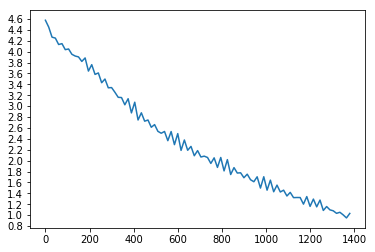

Losses diagram saved in TODO
Models and data saved to disk

28 inputs constructed for testing ...

28 outputs predicted ...

Predictions written to ../output/toy.preprocessed-test.rnn_toy.predicted.postprocessed.en
Blue score written to ../output/toy.preprocessed-testrnn_toy.BLEU
une é@@ t@@ en@@ d@@ u@@ e d&apos; eau avec l@@ a l@@ u@@ m@@ i@@ è@@ r@@ e d@@ u s@@ ol@@ e@@ i@@ l per@@ ç@@ ant l@@ es n@@ u@@ a@@ g@@ es . EOS
une étendue d&apos; eau avec la lumière du soleil perçant les nuages . EOS
a w@@ om@@ an w@@ al@@ k@@ ing in the c@@ it@@ y EOS
a woman walking in the city EOS


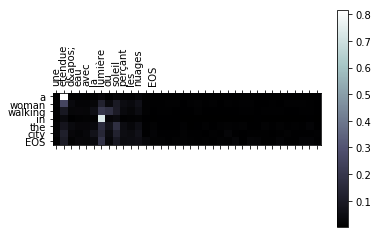

une j@@ e@@ une f@@ il@@ le pos@@ e f@@ ar@@ ou@@ ch@@ em@@ en@@ t en u@@ t@@ il@@ i@@ s@@ ant d@@ u m@@ at@@ é@@ ri@@ e@@ l de f@@ it@@ n@@ e@@ s@@ s . EOS
une jeune fille pose farouchement en utilisant du matériel de fitness . EOS
a y@@ o@@ un@@ g m@@ an and re@@ st@@ a@@ ur@@ ant pos@@ t@@ er EOS
a young man and restaurant poster EOS


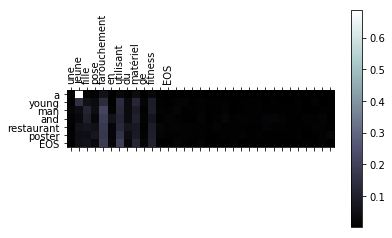

un l@@ a@@ c p@@ a@@ i@@ si@@ b@@ le en@@ t@@ ou@@ r@@ é d&apos; ar@@ b@@ r@@ es et de ro@@ ch@@ er@@ s . EOS
un lac paisible entouré d&apos; arbres et de rochers . EOS
a w@@ om@@ an w@@ al@@ k@@ ing in the c@@ it@@ y EOS
a woman walking in the city EOS


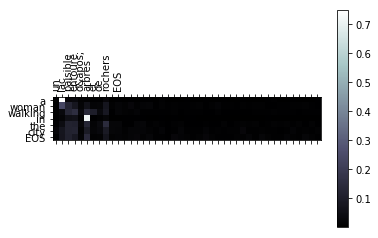

des c@@ l@@ i@@ en@@ t@@ s s@@ on@@ t de@@ b@@ ou@@ t de@@ v@@ ant une su@@ p@@ é@@ re@@ t@@ t@@ e . EOS
des clients sont debout devant une supérette . EOS
c@@ u@@ st@@ om@@ e b@@ r@@ ea@@ k@@ ing o@@ f@@ f with water t@@ o the side . EOS
custome breaking off with water to the side . EOS


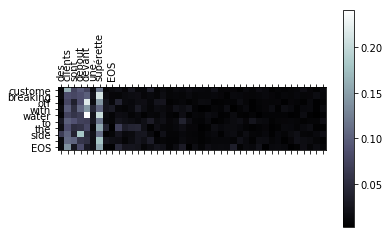

un h@@ om@@ me et une f@@ em@@ me qu@@ i m@@ ar@@ ch@@ en@@ t en v@@ il@@ le EOS
un homme et une femme qui marchent en ville EOS
a m@@ an and a w@@ om@@ an w@@ e@@ ar@@ ing a h@@ el@@ m@@ et EOS
a man and a woman wearing a helmet EOS


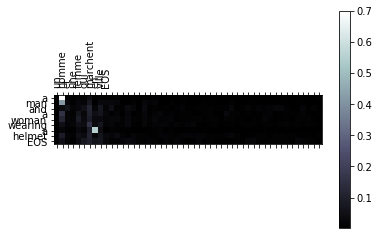

Attention diagrams saved to disk


In [3]:
#### TOY DATA: to test if every thing is working

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 50
max_hours = 9
clip = 10
plot_every = 15
MAX_LENGTH = 24
print_every = 60

(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 80, vocab_threshold = 1,
    padding = False, model_name = 'rnn_toy')


In [4]:
#### RNN: TRAIN and Validation DATA using BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 25
max_hours = 6
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False
MAX_LENGTH = 20
plot_every = 162 #162*162 = 26244 = nr of training sentences
print_every = 26244 # every epoch

(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_val, fp.tpath_val, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False, model_name = 'rnn_bpe')


Data files preprocessed ...

26244 inputs constructed for training ...



NameError: name 'torch' is not defined

In [ ]:
def train_model_pos(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderPOS(s_vocab_size, max_length, hidden_size).to(device)
    attn_decoder = AttnDecoderPOS(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_losses = trainItersPOS(
        index_array_pairs, encoder, attn_decoder, n_epochs, max_length, 
        print_every, plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours, clip=clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every




In [ ]:
#### TOY DATA
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
# n_iters = 10
n_epochs = 30
max_hours = 9
clip = 10

MAX_LENGTH = 24
encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model_pos, predict_allPOS, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = False, num_operations = 80, vocab_threshold = 1,
    padding = False, model_name = 'pos_toy')

In [ ]:
#### TRAIN and TEST DATA WITHOUT BPE
# verplaats directory van je modelsss na runnen 
hidden_size = 256
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 25
max_hours = 6
clip = 8
use_bpe = False
replace_unknown_words = True
padding = True
MAX_LENGTH = 20
plot_every = 162 #162*162 = 26244 = nr of training sentences
print_every = 26244 # every epoch

encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_val, fp.tpath_val, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = False, num_operations = 100, vocab_threshold = 1, 
    padding = False, model_name = 'pos_no_bpe')

In [ ]:
#### TRAIN and TEST DATA WITHOUT BPE
# verplaats directory van je modelsss na runnen 
hidden_size = 256
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 25
max_hours = 6
clip = 8
use_bpe = False
replace_unknown_words = True
padding = True
MAX_LENGTH = 20
plot_every = 162 #162*162 = 26244 = nr of training sentences
print_every = 26244 # every epoch

encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_val, fp.tpath_val, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False, model_name = 'pos_bpe')